# Monopoly market
A monopolist has it's total cost denoted by function $ TC = 100q + 20 $ and the demand is $ p = 200 - 2q $. Plot the market situation and find the quantity and price of good on the market, calculate consumer surplus and monopolists profit.

In [1]:
from sympy import *
from IPython.core.interactiveshell import InteractiveShell
#print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)

In [2]:
def TC(q):
    return 100*q + 20

def p(q):
    return 200 - 2*q

#### PLOT

In [3]:
q = symbols("q")

In [4]:
%%capture
D = p(q)
monopolyplot = plot(D, (q,0,80), ylim=(0,200),
                    line_color='red', ylabel='p', legend=True)

In [5]:
%%capture
MC = TC(q).diff(q)
monopolyplot.extend(plot(MC, (q,0,80), line_color='blue'))

In [6]:
%%capture
TR = p(q)*q
MR = TR.diff(q)
monopolyplot.extend(plot(MR, (q,0,80), line_color='limegreen'))

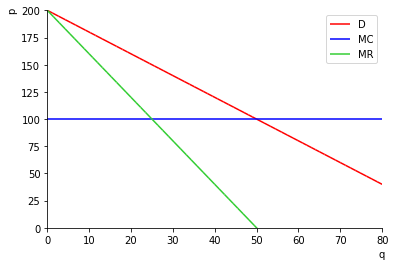

In [7]:
monopolyplot[0].label = 'D'
monopolyplot[1].label = 'MC'
monopolyplot[2].label = 'MR'
monopolyplot.show()

#### EQUILIBRIUM

In [8]:
q_monop_star = solve(MC-MR)[0]
p_monop_star = D.subs(q,q_monop_star)

In [9]:
# quantity and price that maximise profits of monopolist
q_monop_star, p_monop_star

#### CONSUMER SURPLUS, MONOPOLIST PROFIT

In [10]:
q_x = symbols("q_x")
def CS_func(q):
    return integrate(p(q_x), (q_x, 0, q)) - p(q)*q

def profit_monop(q_):
    return TR.subs(q,q_) - TC(q_)

In [11]:
#consumer surplus
CS_func(q_monop_star)
#profit
profit_monop(q_monop_star)

#### AD VALOREM TAX

In [12]:
t = 40

In [13]:
D_t = p(q) - t
TR_t = D_t*q
MR_t = TR_t.diff(q)

In [14]:
%%capture
monopolyplot_t = plot(D_t, (q,0,80), ylim=(0,200), line_color='maroon', ylabel='p', legend=True)
monopolyplot_t.extend(plot(MR_t, (q,0,80), line_color='darkgreen'))
monopolyplot_t[0].label = 'D_t'
monopolyplot_t[1].label = 'MR_t'
monopolyplot_t.extend(monopolyplot)

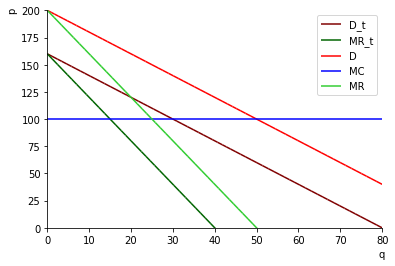

In [15]:
monopolyplot_t.show()

In [16]:
q_monop_star_t = solve(MC-MR_t)[0]
p_monop_star_t = D_t.subs(q,q_monop_star)

In [17]:
q_monop_star_t
p_monop_star_t

In [18]:
#consumer surplus
CS_func(q_monop_star_t)
# profit
TR_t.subs(q,q_monop_star_t)-TC(q_monop_star_t)